In [1]:
import pandas as pd
import numpy as np
import pydotplus
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image
from io import StringIO

In [11]:
# since csv file doesnt have headers, we need to define them
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [14]:
# df needs to use the column names that we have previously defined
df=pd.read_csv("data/diabetes.csv", header=None, names=col_names)

In [15]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Count values means no missing data

In [17]:
# Target Values
print(df.label.value_counts())

label
0    500
1    268
Name: count, dtype: int64


# Draw a scatter plot for glucose and insulin with different labels identified.

scatter_matrix(df)


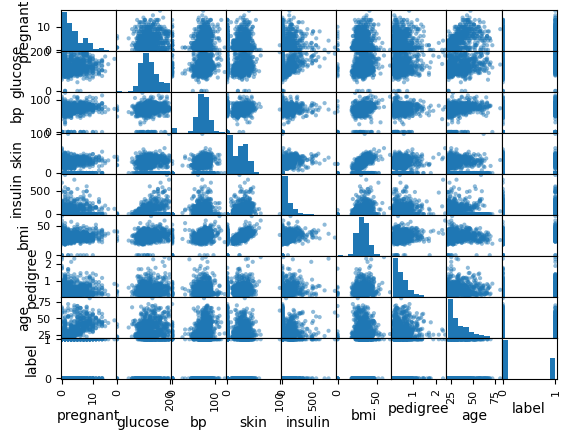

In [18]:
print("scatter_matrix(df)")
scatter_matrix(df)
plt.show()

No clear separation of label values shown

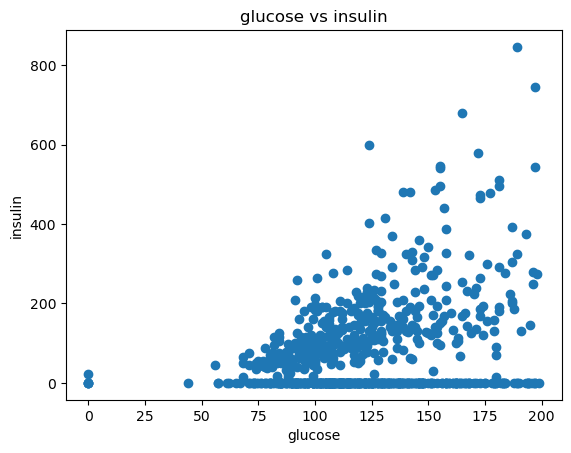

In [24]:
plt.scatter(df.glucose, df.insulin)
plt.title("glucose vs insulin")
plt.xlabel("glucose")
plt.ylabel("insulin")
plt.show()

In [20]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Find all setosas (d[:, 4]):
 []


C:\Users\Palej\AppData\Local\Temp\ipykernel_17460\3365401160.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print("Find all setosas (d[:, 4]):\n", d[d[:, 4] == "setosa", 0])
C:\Users\Palej\AppData\Local\Temp\ipykernel_17460\3365401160.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.scatter(d[d[:,1] == "glucose", 1], d[d[:,1] == "glucose", 1], c='lightgreen', marker='s', edgecolor='black', label='glucose')
C:\Users\Palej\AppData\Local\Temp\ipykernel_17460\3365401160.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.scatter(d[d[:,1] == "insulin", 3], d[d[:,1] == "insulin", 1], c='orange', marker='o', edgecolor='black', label='insulin')


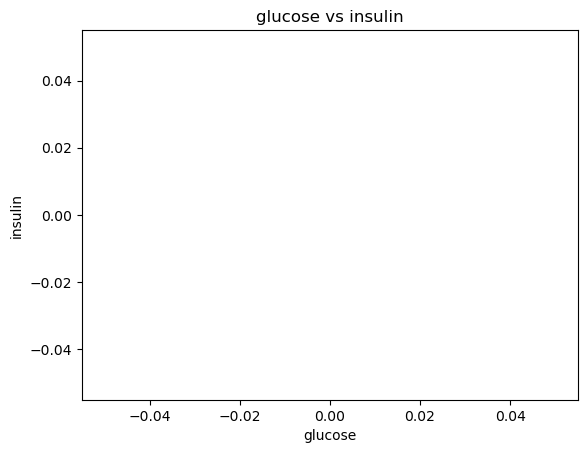

In [27]:
d = df.to_numpy()
d = np.array(df)
print("Find all setosas (d[:, 4]):\n", d[d[:, 4] == "setosa", 0])

plt.scatter(d[d[:,1] == "glucose", 1], d[d[:,1] == "glucose", 1], c='lightgreen', marker='s', edgecolor='black', label='glucose')
plt.scatter(d[d[:,1] == "insulin", 3], d[d[:,1] == "insulin", 1], c='orange', marker='o', edgecolor='black', label='insulin')

plt.title("glucose vs insulin")
plt.xlabel("glucose")
plt.ylabel("insulin")

plt.show()


Can see some useful cuts (decisions) but not as clear cut as in the iris data. 0 for insulin and glusore greater than 60